In [ ]:
import requests
import json
import time
import math

import numpy as np
import pandas as pd
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

from google.colab import files
from datetime import date, datetime, timedelta

In [ ]:
def addColumnPrefix(cols, prefix):
  columns_rename_dict={}
  for col in cols:
    columns_rename_dict[col]=prefix+'-'+col
  return columns_rename_dict

### from cryptoslam.io

### Collecting top collections 
Can be extended to ~19k

##### From saved

In [ ]:
# uploaded = files.upload()

In [ ]:
# collections_df=pd.read_csv('cryptoslam_collections.csv',index_col = [0])

In [ ]:
# collections_df

In [ ]:
collections=collections_df.to_dict('records')

##### Downloading new 

In [ ]:
collections=[]
url1="https://web-api.cryptoslam.io/web-api/v1/sales/rank-by-volume?timeRange=month&orderBy=rank&sortDirection=asc&offset=0&limit=1000"
response = requests.get(url1)
if response.status_code==200:
    results1=json.loads(response.text)['saleSummaries']
    for result in results1:
        collection={'slug':result['productPath']}
        # print(collection)
        url2="https://www.cryptoslam.io/_next/data/6GIL3GMx49LI7nHv0NrZP/"+collection['slug']+".json?collectionName="+collection['slug']
        response = requests.get(url2)
        if response.status_code==200:
            results2=json.loads(response.text)['pageProps'] 
            # print(results2)
            if 'dehydratedState' in results2.keys():
                collection['name']=results2['dehydratedState']['queries'][0]['state']['data']['name']
                collection['description']=results2['dehydratedState']['queries'][0]['state']['data']['description']
                collection['platform']=results2['dehydratedState']['queries'][0]['state']['data']['platform']
                collection['paymentToken']=results2['dehydratedState']['queries'][0]['state']['data']['paymentToken']
                collection['contractAddress']=results2['dehydratedState']['queries'][0]['state']['data']['contractAddress'].split('|')[0] if results2['dehydratedState']['queries'][0]['state']['data']['contractAddress']!=None else None
                collection['discordUrl']=results2['dehydratedState']['queries'][0]['state']['data']['discordUrl']
                collection['twitterUrl']=results2['dehydratedState']['queries'][0]['state']['data']['twitterUrl']
                collection['tokenCount']=results2['dehydratedState']['queries'][0]['state']['data']['tokenCount']
                print(collection)
                collections.append(collection.copy())
        else:
            print('URL:',url2)
            print(response.text)
else:
    print('URL:',url1)
    print(response.text)

In [ ]:
print('Number of collections: ',len(collections))

Number of collections:  974


In [ ]:
collections_df = pd.DataFrame(collections)

In [ ]:
collections_df

,slug,name,description,platform,paymentToken,contractAddress,discordUrl,twitterUrl,tokenCount
0,bored-ape-yacht-club,Bored Ape Yacht Club,The Bored Ape Yacht Club is a collection of 10...,ethereum,ETH,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,https://discord.gg/3P5K3dzgdB,https://twitter.com/BoredApeYC,10000
1,dmarket,DMarket,NFT and Virtual In-game Items Metaverse. Enabl...,mythos,MYTH,0x1cd2c2fe1805daa5f9016b89634896b3f5c60245,https://discord.gg/23Z6nxf,https://twitter.com/dmarket,4580344
2,azuki,Azuki,Take the red bean to join the garden. View the...,ethereum,ETH,0xED5AF388653567Af2F388E6224dC7C4b3241C544,https://discord.gg/azuki,https://twitter.com/azukiofficial,10000
3,mad-lads-1,Mad Lads,The Mad Lads collection by Backpack.,solana,SOL,5XvhfmRjwXkGp3jHGmaKpqeerNYjkuZZBYLVQYdeVcRv,https://discord.gg/madlads,https://twitter.com/MadLadsNFT,9967
4,mutant-ape-yacht-club,Mutant Ape Yacht Club,The MUTANT APE YACHT CLUB is a collection of u...,ethereum,ETH,0x60e4d786628fea6478f785a6d7e704777c86a7c6,,,19469
...,...,...,...,...,...,...,...,...,...
969,0x86825dfca7a6224cfbd2da48e85df2fc3aa7c4b1,RTFKT - MNLTH,None,ethereum,ETH,0x86825dfca7a6224cfbd2da48e85df2fc3aa7c4b1,https://discord.gg/rtfkt,https://www.twitter.com/RTFKT,1
970,digimonkzgen2,DigiMonkzGen2,"1,111 Lifetime Pass NFTs of premium content f...",ethereum,ETH,0x3067599c11118d2d4c708d119820775425af029c,https://discord.gg/digimonkz,https://www.twitter.com/DigiMonkz,12
971,hunters2,Boomland - Hunters,"BoomLand, the creator of Hunters On-Chain, is ...",polygon,MATIC,0x20b807b9af56977ef475c089a0e7977540743560,https://discord.gg/boomland,https://www.twitter.com/BoomLandGames,2144
972,coliseum,Coliseum,None,ethereum,ETH,0x08244ac887bb5d8d689315ce6335d742350133e6,None,None,341


In [ ]:
collections_df.to_csv('collections.csv')

In [ ]:
files.download('collections.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Taking help of non-fungible datset to identify category

##### From saved

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cryptoslam_collections.csv to cryptoslam_collections (1).csv
Saving non_fungible_collections.csv to non_fungible_collections.csv


In [ ]:
nf_collections_df=pd.read_csv('non_fungible_collections.csv',index_col=[0])

In [ ]:
nf_collections_df

,project,projectSlug,date,description,discord,twitter,title,category,address,token,type,slug
0,The Sandbox,thesandbox,2020-03-09T04:45:41,<p>The Sandbox is a community-driven UGC-voxel...,https://discord.gg/vAe4zvY,https://twitter.com/thesandboxgame,Sandbox's ASSETs,item,0x067a1eb5e383ed24b66d72aaf80d8d7db3d299a8,ASSET,ERC721,sandboxs-assets
1,The Sandbox,thesandbox,2020-03-09T04:45:41,<p>The Sandbox is a community-driven UGC-voxel...,https://discord.gg/vAe4zvY,https://twitter.com/thesandboxgame,Sandbox's LANDs,land,0x50f5474724e0ee42d9a4e711ccfb275809fd6d4a,LAND,ERC721,sandboxs-lands-
2,The Sandbox,thesandbox,2020-03-09T04:45:41,<p>The Sandbox is a community-driven UGC-voxel...,https://discord.gg/vAe4zvY,https://twitter.com/thesandboxgame,Sandbox's ESTATEs,land,0xf17131a4c85e8a75ba52b3f91ce8c32f6f163924,ESTATE,ERC721,sandboxs-estates
3,Bored Ape Yacht Club,boredapeclub,2021-07-08T00:16:35,"<p>BAYC is a collection of 10,000 Bored Ape NF...",https://discord.gg/3P5K3dzgdB,https://twitter.com/BoredApeYC,Bored Ape Yacht Club,collectible,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,BAYC,ERC721,bored-ape-yacht-club
4,Bored Ape Yacht Club,boredapeclub,2021-07-08T00:16:35,"<p>BAYC is a collection of 10,000 Bored Ape NF...",https://discord.gg/3P5K3dzgdB,https://twitter.com/BoredApeYC,Bored Ape Kennel Club,collectible,0xba30e5f9bb24caa003e9f2f0497ad287fdf95623,BAKC,ERC721,bored-ape-kennel-club
...,...,...,...,...,...,...,...,...,...,...,...,...
1241,CryptoZombies,cryptozombies,2020-04-27T14:42:21,<p>CryptoZombies is an interactive school that...,NaN,https://twitter.com/loomnetwork,CryptoZombiesBattlegroundGiftToken,collectible,NaN,CZBGT,ERC721,cryptozombiesbattlegroundgifttoken
1242,Cel Mates,cel-mates,2023-04-06T13:04:27,<p>Each Cel Mate is an inmate of the Steel Hos...,https://discord.gg/RtfwsnejAE,https://twitter.com/cel_mates,Celmates,collectible,0x23f0dcecfe50f70d0c87578fd6a14F59900ab5e1,CELMATES,ERC721,celmates
1243,Cel Mates,cel-mates,2023-04-06T13:04:27,<p>Each Cel Mate is an inmate of the Steel Hos...,https://discord.gg/RtfwsnejAE,https://twitter.com/cel_mates,Crimereports,collectible,0xd0fabbba5fd95411a07bb2fdcf31295639376937,CRIMES,ERC721,crimereports
1244,Braindrops,braindrops-2,2023-04-06T10:17:43,"<div class=""MuiBox-root jss9"">\n<p class=""MuiT...",https://discord.gg/aEq8BYdf6R,https://twitter.com/braindrops_art,BrainDrops,art,0xdfde78d2baec499fe18f2be74b6c287eed9511d7,BRAIN,ERC721,braindrops


In [ ]:
nf_collections=nf_collections_df.to_dict('records')

### Merging

In [ ]:
count={'item':0, 'land':0, 'collectible':0, 'ugc':0, 'access':0, 'character':0, 'art':0,
       'name':0, 'wearable':0, 'yield':0, 'card':0, 'vehicle':0}

item_collections=[]
vl_collections=[]
collectible_collections=[]
character_collections=[]

for collection in collections:
    for nf_collection in nf_collections:
        if collection['slug']==nf_collection['title'].strip().replace(' ','-').replace("'","").lower() or collection['contractAddress']==nf_collection['address']:
            if collection['contractAddress']!='' or collection['contractAddress']!=None:
                count[nf_collection['category']]+=1
                if nf_collection['category']=='item':
                    item_collections.append(collection)
                elif nf_collection['category']=='land':
                    vl_collections.append(collection)
                elif nf_collection['category']=='collectible':
                    collectible_collections.append(collection)
                elif nf_collection['category']=='character':
                    character_collections.append(collection)
                break        

In [ ]:
count

{'item': 9,
 'land': 6,
 'collectible': 116,
 'ugc': 1,
 'access': 14,
 'character': 4,
 'art': 13,
 'name': 1,
 'wearable': 0,
 'yield': 0,
 'card': 1,
 'vehicle': 0}

In [ ]:
item_collections=item_collections[:10]
vl_collections=vl_collections[:10]
collectible_collections=collectible_collections[:10]
character_collections=character_collections[:10]

In [ ]:
active_collections=collectible_collections

In [ ]:
active_collections

[{'slug': 'bored-ape-yacht-club',
  'name': 'Bored Ape Yacht Club',
  'description': 'The Bored Ape Yacht Club is a collection of 10,000 unique Bored Ape NFTs— unique digital collectibles living on the Ethereum blockchain. Your Bored Ape doubles as your Yacht Club membership card, and grants access to members-only benefits, the first of wh',
  'platform': 'ethereum',
  'paymentToken': 'ETH',
  'contractAddress': '0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d',
  'discordUrl': 'https://discord.gg/3P5K3dzgdB',
  'twitterUrl': 'https://twitter.com/BoredApeYC',
  'tokenCount': 10000},
 {'slug': 'azuki',
  'name': 'Azuki',
  'description': 'Take the red bean to join the garden. View the collection at\xa0[azuki.com/gallery](https://azuki.com/gallery).\r\n\r\nAzuki starts with a collection of 10,000 avatars that give you membership access to The Garden: a corner of the internet where artists, builder',
  'platform': 'ethereum',
  'paymentToken': 'ETH',
  'contractAddress': '0xED5AF388653567Af2F3

### Collecting sales data

In [ ]:
def extract_time(json):
    try:
        return int(datetime.timestamp(datetime.strptime(json['timeStamp'],'%Y-%m-%dT%H:%M:%S')))
    except KeyError:
        return 0

In [ ]:
def initilaze_dates():
    start_date="2022-12-01"
    # start_date="2022-09-01"
    end_date="2023-03-01"

    end_date_obj = datetime.strptime(end_date, '%Y-%m-%d').date()
    start_date_obj = datetime.strptime(start_date, '%Y-%m-%d').date()

    return [start_date_obj,end_date_obj]

In [ ]:
files.download('azuki.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
seed=1
for collection in active_collections[9:]:
    print(collection['slug'])
    sales=[]
    start_date_obj,end_date_obj=initilaze_dates()
    if 'contractAddress' not in collection.keys():
        continue
    seen_token_ids=[]
    while start_date_obj<end_date_obj:
        current_date_obj=end_date_obj-timedelta(days=7)
        print(current_date_obj,end_date_obj)
        url="https://web-api.cryptoslam.io/web-api/v1/collections/"+collection['slug']+"/activity?limit=500&startDate="+current_date_obj.strftime("%Y-%m-%d")+"T00:00:00&endDate="+end_date_obj.strftime("%Y-%m-%d")+"T00:00:00&method=salesdefault"
        print(url)
        response = requests.get(url)
        if response.status_code==200:
            data=json.loads(response.text)
            metadataResults=data['data']
            # print(metadataResults)
            for i in range(math.floor(len(metadataResults)/seed)):
                metadataResult=metadataResults[i*seed]
                tokenId= metadataResult['tokenId']
                if tokenId not in seen_token_ids and tokenId!='':
                    seen_token_ids.append(tokenId)
                    url="https://web-api.cryptoslam.io/web-api/v1/mint/"+collection['slug']+"/token/"+str(tokenId)+"/sales/"+collection['contractAddress']
                    print(url)
                    response = requests.get(url)
                    if response.status_code==200:
                        results=json.loads(response.text)
                        results.sort(key=extract_time, reverse=False)
                        for i in range(len(results)):
                            if results[i]['price'] <=0 or results[i]['priceUSD'] <=0 :
                                continue
                            sale={
                                'project':collection['slug'],
                                'platform':collection['platform'],
                                'tokenCount':collection['tokenCount'],
                                'token':tokenId,
                                'sale': 'secondary' if i!=0 else 'primary',
                                'rarityRank':metadataResult['rarityRank'],
                                'odds':metadataResult['odds'],
                                'price':results[i]['price'],
                                'paymentToken':results[i]['paymentToken'],
                                'priceUSD':results[i]['priceUSD'],
                                'timestamp':datetime.strptime(results[i]['timeStamp'],'%Y-%m-%dT%H:%M:%S').date(),
                                'tokenUsd':results[i]['priceUSD']/results[i]['price'],
                                'prev-price':results[i-1]['price'] if i!=0 else None,
                                'prev-paymentToken':results[i-1]['paymentToken'] if i!=0 else None,
                                'prev-priceUSD':results[i-1]['priceUSD'] if i!=0 else None,
                                'prev-timestamp':datetime.strptime(results[i-1]['timeStamp'],'%Y-%m-%dT%H:%M:%S').date() if i!=0 else None,
                                'prev-tokenUsd':results[i-1]['priceUSD']/results[i-1]['price'] if i!=0 and results[i-1]['price'] >0 else None,
                                'numPrevSales':i
                            }
                            sale['holdtime']=int(datetime.timestamp(datetime.strptime(results[i]['timeStamp'],'%Y-%m-%dT%H:%M:%S')))-int(datetime.timestamp(datetime.strptime(results[i-1]['timeStamp'],'%Y-%m-%dT%H:%M:%S'))) if i!=0 else None
                            print(sale)
                            sales.append(sale.copy())
                    else:
                        print('URL:',url)
                        print('ERROR:',response.text)
        else:
            print('URL:',url)
            print('ERROR:',response.text)
        end_date_obj=current_date_obj
    sales_df=pd.DataFrame(sales)
    sales_df.to_csv(collection['slug']+'.csv')
    files.download(collection['slug']+'.csv')

In [ ]:
sales_df=pd.DataFrame()
for collection in active_collections:
    df=pd.read_csv(collection['slug']+'.csv',index_col=[0])
    # df=df[df['sale']=='secondary']
    if sales_df.empty:
      sales_df=df
    else: 
      sales_df=pd.concat([sales_df,df])
# sales_df=sales_df.drop(['sale'],axis=1)
sales_df=sales_df.drop(['price'],axis=1)
sales_df=sales_df.drop(['paymentToken'],axis=1)
sales_df=sales_df.drop(['tokenUsd'],axis=1)
sales_df=sales_df.drop(['prev-price'],axis=1)
sales_df=sales_df.drop(['prev-paymentToken'],axis=1)
sales_df=sales_df.drop(['prev-tokenUsd'],axis=1)

In [ ]:
sales_df

,project,platform,tokenCount,token,rarityRank,odds,priceUSD,timestamp,prev-priceUSD,prev-timestamp,numPrevSales,holdtime
1,bored-ape-yacht-club,ethereum,10000,356,3449,25.961765,117828.6953,2023-02-28,221.6232,2021-04-30,1,57885505.0
2,bored-ape-yacht-club,ethereum,10000,356,3449,25.961765,111873.6094,2023-03-06,117828.6953,2023-02-28,2,514656.0
3,bored-ape-yacht-club,ethereum,10000,356,3449,25.961765,111811.0313,2023-03-07,111873.6094,2023-03-06,3,4716.0
4,bored-ape-yacht-club,ethereum,10000,356,3449,25.961765,112296.0078,2023-03-07,111811.0313,2023-03-07,4,32016.0
5,bored-ape-yacht-club,ethereum,10000,356,3449,25.961765,97801.5234,2023-03-10,112296.0078,2023-03-07,5,244428.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21814,bored-ape-kennel-club,ethereum,9602,6545,6877,21.030376,9176.7256,2022-11-30,9099.5615,2022-11-29,2,132732.0
21816,bored-ape-kennel-club,ethereum,9602,1276,2327,31.315593,9637.1416,2022-11-27,12112.3350,2022-07-09,1,12123559.0
21817,bored-ape-kennel-club,ethereum,9602,1276,2327,31.315593,9971.4424,2022-11-30,9637.1416,2022-11-27,2,275340.0
21818,bored-ape-kennel-club,ethereum,9602,1276,2327,31.315593,11029.2139,2023-03-21,9971.4424,2022-11-30,3,9643932.0


In [ ]:
sales_df.project.unique()

array(['bored-ape-yacht-club', 'azuki', 'mutant-ape-yacht-club', 'milady',
       'cryptopunks', 'clonex', 'beanz', 'bored-ape-kennel-club'],
      dtype=object)

In [ ]:
sales_df.isnull().sum()

project           0
platform          0
tokenCount        0
token             0
rarityRank        0
odds              0
priceUSD          0
timestamp         0
prev-priceUSD     0
prev-timestamp    0
numPrevSales      0
holdtime          0
dtype: int64

In [ ]:
sales_df=sales_df[sales_df['tokenCount']!=0]
# sales_df=sales_df[sales_df['price']!=0]
sales_df=sales_df[sales_df['priceUSD']!=0]
# sales_df=sales_df[sales_df['prev-price']!=0]
sales_df=sales_df[sales_df['prev-priceUSD']!=0]

In [ ]:
sales_df.columns

Index(['project', 'platform', 'tokenCount', 'token', 'rarityRank', 'odds',
       'priceUSD', 'timestamp', 'prev-priceUSD', 'prev-timestamp',
       'numPrevSales', 'holdtime'],
      dtype='object')

In [ ]:
sales_df=sales_df.sort_values(by=['timestamp'], ascending=False)

In [ ]:
sales_df=sales_df[:30000]

### Collecting project sales statistics

In [ ]:
for p in sales_df.project.unique():
    print(p,len(sales_df.query("project=='"+p+"'")))

milady 2657
beanz 7702
mutant-ape-yacht-club 5234
azuki 3684
bored-ape-kennel-club 4797
clonex 5029
bored-ape-yacht-club 847
cryptopunks 50


In [ ]:
project_sales_stats=pd.DataFrame()

for collection in active_collections:
  # Gets sale statistics of entire project
  url="https://web-api.cryptoslam.io/web-api/v1/sales/"+collection['slug']+"/summary?groupingtype=daily"
  response = requests.get(url)
  if response.status_code ==200:
    data=json.loads(response.text)['salesSummaryRecords']
    df = pd.DataFrame.from_dict(data)
    df['date'] = df['date'].apply(lambda x: int(datetime.timestamp(datetime.strptime(x.split('T')[0],"%Y-%m-%d"))))
    df['project']=collection['slug']
    df['index']=df['date']
    df['index']=df['index'].apply(lambda x: collection['slug'] + str(x))
    df=df.set_index('index')
    if project_sales_stats.empty:
      project_sales_stats=df
    else: 
      project_sales_stats=pd.concat([project_sales_stats,df])
  else:
    print('QUERY:',url)
    print('RESPONSE:',response.text)

In [ ]:
project_sales_stats

,date,salesUSD,salesToken,uniqueBuyers,sellers,totalTransactions,activeOwners,totalOwners,transfers,mints,burns,avgPriceUSD,avgPriceToken,project
index,,,,,,,,,,,,,,
bored-ape-yacht-club1619136000,1619136000,2074.27,0.880000,11,1,11,5,22,37,33,0,188.570000,0.080000,bored-ape-yacht-club
bored-ape-yacht-club1619222400,1619222400,2862.84,1.280000,14,1,16,3,44,53,52,0,178.927500,0.080000,bored-ape-yacht-club
bored-ape-yacht-club1619308800,1619308800,1472.33,0.640000,8,1,8,1,53,9,8,0,184.041250,0.080000,bored-ape-yacht-club
bored-ape-yacht-club1619395200,1619395200,1616.64,0.640000,8,1,8,4,73,73,70,0,202.080000,0.080000,bored-ape-yacht-club
bored-ape-yacht-club1619481600,1619481600,2540.51,0.960000,11,1,12,5,92,47,46,0,211.709167,0.080000,bored-ape-yacht-club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bored-ape-kennel-club1683331200,1683331200,64469.89,33.672000,11,14,6,17,5640,26,0,0,10744.981667,5.612000,bored-ape-kennel-club
bored-ape-kennel-club1683417600,1683417600,48478.76,23.325600,20,31,6,30,5625,376,0,0,8079.793333,3.887600,bored-ape-kennel-club
bored-ape-kennel-club1683504000,1683504000,87372.33,45.057120,34,25,11,31,5632,87,0,0,7942.939091,4.096102,bored-ape-kennel-club


In [ ]:
project_sales_stats.rename(columns = {'date':'timestamp'}, inplace = True)
renamed_columns=addColumnPrefix(['salesUSD', 'salesToken', 'uniqueBuyers', 'sellers',
       'totalTransactions', 'activeOwners', 'totalOwners', 'transfers',
       'mints', 'burns', 'avgPriceUSD', 'avgPriceToken'],'project')
project_sales_stats.rename(columns = renamed_columns , inplace = True)

In [ ]:
project_sales_stats['timestamp']=project_sales_stats['timestamp']+86400

In [ ]:
project_sales_stats['tokenUsd']=project_sales_stats['project-salesUSD']/project_sales_stats['project-salesToken']

In [ ]:
project_sales_stats=project_sales_stats[project_sales_stats['project-salesUSD']!=0]
project_sales_stats=project_sales_stats[project_sales_stats['project-salesToken']!=0]
project_sales_stats=project_sales_stats[project_sales_stats['project-avgPriceUSD']!=0]
project_sales_stats=project_sales_stats[project_sales_stats['project-avgPriceToken']!=0]

In [ ]:
project_sales_stats.isnull().sum()

timestamp                    0
project-salesUSD             0
project-salesToken           0
project-uniqueBuyers         0
project-sellers              0
project-totalTransactions    0
project-activeOwners         0
project-totalOwners          0
project-transfers            0
project-mints                0
project-burns                0
project-avgPriceUSD          0
project-avgPriceToken        0
project                      0
tokenUsd                     0
dtype: int64

In [ ]:
project_sales_stats=project_sales_stats.dropna()

In [ ]:
project_sales_stats

,timestamp,project-salesUSD,project-salesToken,project-uniqueBuyers,project-sellers,project-totalTransactions,project-activeOwners,project-totalOwners,project-transfers,project-mints,project-burns,project-avgPriceUSD,project-avgPriceToken,project,tokenUsd
index,,,,,,,,,,,,,,,
bored-ape-yacht-club1619136000,1619222400,2074.27,0.880000,11,1,11,5,22,37,33,0,188.570000,0.080000,bored-ape-yacht-club,2357.125053
bored-ape-yacht-club1619222400,1619308800,2862.84,1.280000,14,1,16,3,44,53,52,0,178.927500,0.080000,bored-ape-yacht-club,2236.593800
bored-ape-yacht-club1619308800,1619395200,1472.33,0.640000,8,1,8,1,53,9,8,0,184.041250,0.080000,bored-ape-yacht-club,2300.515676
bored-ape-yacht-club1619395200,1619481600,1616.64,0.640000,8,1,8,4,73,73,70,0,202.080000,0.080000,bored-ape-yacht-club,2526.000056
bored-ape-yacht-club1619481600,1619568000,2540.51,0.960000,11,1,12,5,92,47,46,0,211.709167,0.080000,bored-ape-yacht-club,2646.364642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bored-ape-kennel-club1683331200,1683417600,64469.89,33.672000,11,14,6,17,5640,26,0,0,10744.981667,5.612000,bored-ape-kennel-club,1914.643922
bored-ape-kennel-club1683417600,1683504000,48478.76,23.325600,20,31,6,30,5625,376,0,0,8079.793333,3.887600,bored-ape-kennel-club,2078.349997
bored-ape-kennel-club1683504000,1683590400,87372.33,45.057120,34,25,11,31,5632,87,0,0,7942.939091,4.096102,bored-ape-kennel-club,1939.145897


In [ ]:
project_sales_stats.to_csv('project_sales_stats.csv',index=False)

### Collecting platform data

In [ ]:
for p in sales_df.platform.unique():
    print(p,len(sales_df.query("platform=='"+p+"'")))

ethereum 30000


In [ ]:
platform_stats_df=pd.DataFrame()

for platform in collections_df.platform.unique():
  url="https://web-api.cryptoslam.io/web-api/v1/nft-indexes/"+platform
  response = requests.get(url)
  if response.status_code ==200:
    results=json.loads(response.text)
    for mon in results.keys():
        df = pd.DataFrame.from_dict(results[mon]['dailySummaries'],orient='index')
        df['timestamp'] = df.index
        df['timestamp'] = df['timestamp'].apply(lambda x: int(datetime.timestamp(datetime.strptime(x.split('T')[0],"%Y-%m-%d"))))
        df['platform']=platform
        df['index']=df['timestamp']
        df['index']=df['index'].apply(lambda x: platform + str(x))
        df=df.set_index('index')
        if platform_stats_df.empty:
            platform_stats_df=df
        else: 
            platform_stats_df=pd.concat([platform_stats_df,df])
  else:
    print('QUERY:',url)
    print('RESPONSE:',response.text)

In [ ]:
platform_stats_df

,totalTransactions,uniqueBuyers,uniqueSellers,totalPriceUSD,isRollingHoursData,productNames,productNamesWithoutAnySale,washSalesUsd,washTransactions,washSalesPercentage,timestamp,platform
index,,,,,,,,,,,,
ethereum1514764800,9,864,708,5920.05,False,None,None,0.0,0,0.0000,1514764800,ethereum
ethereum1514851200,3,899,709,354.21,False,None,None,0.0,0,0.0000,1514851200,ethereum
ethereum1514937600,2,561,474,187.78,False,None,None,0.0,0,0.0000,1514937600,ethereum
ethereum1515024000,2,373,371,219.05,False,None,None,0.0,0,0.0000,1515024000,ethereum
ethereum1515283200,1,526,554,143.38,False,None,None,0.0,0,0.0000,1515283200,ethereum
...,...,...,...,...,...,...,...,...,...,...,...,...
algorand1683331200,488,157,189,8203.63,False,None,None,0.0,0,0.0000,1683331200,algorand
algorand1683417600,459,135,149,5398.89,False,None,None,2.0,1,0.0003,1683417600,algorand
algorand1683504000,403,152,152,12402.37,False,None,None,0.0,0,0.0000,1683504000,algorand


In [ ]:
platform_stats_df.columns

Index(['totalTransactions', 'uniqueBuyers', 'uniqueSellers', 'totalPriceUSD',
       'isRollingHoursData', 'productNames', 'productNamesWithoutAnySale',
       'washSalesUsd', 'washTransactions', 'washSalesPercentage', 'timestamp',
       'platform'],
      dtype='object')

In [ ]:
renamed_columns=addColumnPrefix(['totalTransactions', 'uniqueBuyers', 'uniqueSellers', 'totalPriceUSD',
       'isRollingHoursData', 'productNames', 'productNamesWithoutAnySale',
       'washSalesUsd', 'washTransactions', 'washSalesPercentage'],'platform')
platform_stats_df.rename(columns = renamed_columns , inplace = True)

In [ ]:
platform_stats_df['timestamp']=platform_stats_df['timestamp']+86400

In [ ]:
platform_stats_df=platform_stats_df[platform_stats_df['platform-totalPriceUSD']>0]

In [ ]:
platform_stats_df=platform_stats_df.drop(['platform-isRollingHoursData'],axis=1)
platform_stats_df=platform_stats_df.drop(['platform-productNames'],axis=1)
platform_stats_df=platform_stats_df.drop(['platform-productNamesWithoutAnySale'],axis=1)

In [ ]:
platform_stats_df

,platform-totalTransactions,platform-uniqueBuyers,platform-uniqueSellers,platform-totalPriceUSD,platform-washSalesUsd,platform-washTransactions,platform-washSalesPercentage,timestamp,platform
index,,,,,,,,,
ethereum1514764800,9,864,708,5920.05,0.0,0,0.0000,1514851200,ethereum
ethereum1514851200,3,899,709,354.21,0.0,0,0.0000,1514937600,ethereum
ethereum1514937600,2,561,474,187.78,0.0,0,0.0000,1515024000,ethereum
ethereum1515024000,2,373,371,219.05,0.0,0,0.0000,1515110400,ethereum
ethereum1515283200,1,526,554,143.38,0.0,0,0.0000,1515369600,ethereum
...,...,...,...,...,...,...,...,...,...
algorand1683331200,488,157,189,8203.63,0.0,0,0.0000,1683417600,algorand
algorand1683417600,459,135,149,5398.89,2.0,1,0.0003,1683504000,algorand
algorand1683504000,403,152,152,12402.37,0.0,0,0.0000,1683590400,algorand


### Collecting nft sales data

In [ ]:
nft_sales_stats_df=pd.DataFrame()

url="https://web-api.cryptoslam.io/web-api/v1/nft-indexes/NFTGlobal"
response = requests.get(url)
if response.status_code ==200:
    results=json.loads(response.text)
    for mon in results.keys():
        df = pd.DataFrame.from_dict(results[mon]['dailySummaries'],orient='index')
        df['timestamp'] = df.index
        df['timestamp'] = df['timestamp'].apply(lambda x: int(datetime.timestamp(datetime.strptime(x.split('T')[0],"%Y-%m-%d"))))
        if nft_sales_stats_df.empty:
            nft_sales_stats_df=df
        else: 
            nft_sales_stats_df=pd.concat([nft_sales_stats_df,df])
else:
    print('QUERY:',url)
    print('RESPONSE:',response.text)

In [ ]:
nft_sales_stats_df

,totalTransactions,uniqueBuyers,uniqueSellers,totalPriceUSD,isRollingHoursData,productNames,productNamesWithoutAnySale,washSalesUsd,washTransactions,washSalesPercentage,timestamp
2018-01-01T00:00:00,9,864,708,5.920050e+03,False,None,None,0.00,0,0,1514764800
2018-01-02T00:00:00,3,899,709,3.542100e+02,False,None,None,0.00,0,0,1514851200
2018-01-03T00:00:00,2,561,474,1.877800e+02,False,None,None,0.00,0,0,1514937600
2018-01-04T00:00:00,2,373,371,2.190500e+02,False,None,None,0.00,0,0,1515024000
2018-01-07T00:00:00,1,526,554,1.433800e+02,False,None,None,0.00,0,0,1515283200
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-06T00:00:00,194821,43003,50308,1.304586e+07,False,None,None,8815907.57,6364,0,1683331200
2023-05-07T00:00:00,197496,41865,50184,1.433715e+07,False,None,None,12783383.70,7081,0,1683417600
2023-05-08T00:00:00,234530,46117,54897,1.661597e+07,False,None,None,18381558.45,5898,0,1683504000
2023-05-09T00:00:00,265132,50470,61716,1.797037e+07,False,None,None,16256947.22,5695,0,1683590400


In [ ]:
nft_sales_stats_df.columns

Index(['totalTransactions', 'uniqueBuyers', 'uniqueSellers', 'totalPriceUSD',
       'isRollingHoursData', 'productNames', 'productNamesWithoutAnySale',
       'washSalesUsd', 'washTransactions', 'washSalesPercentage', 'timestamp'],
      dtype='object')

In [ ]:
renamed_columns=addColumnPrefix(['totalTransactions', 'uniqueBuyers', 'uniqueSellers', 'totalPriceUSD',
       'isRollingHoursData', 'productNames', 'productNamesWithoutAnySale',
       'washSalesUsd', 'washTransactions', 'washSalesPercentage'],'nft-market')
nft_sales_stats_df.rename(columns = renamed_columns , inplace = True)

In [ ]:
nft_sales_stats_df['timestamp']=nft_sales_stats_df['timestamp']+86400

In [ ]:
nft_sales_stats_df=nft_sales_stats_df.drop(['nft-market-isRollingHoursData'],axis=1)
nft_sales_stats_df=nft_sales_stats_df.drop(['nft-market-productNames'],axis=1)
nft_sales_stats_df=nft_sales_stats_df.drop(['nft-market-productNamesWithoutAnySale'],axis=1)

In [ ]:
nft_sales_stats_df

,nft-market-totalTransactions,nft-market-uniqueBuyers,nft-market-uniqueSellers,nft-market-totalPriceUSD,nft-market-washSalesUsd,nft-market-washTransactions,nft-market-washSalesPercentage,timestamp
2018-01-01T00:00:00,9,864,708,5.920050e+03,0.00,0,0,1514851200
2018-01-02T00:00:00,3,899,709,3.542100e+02,0.00,0,0,1514937600
2018-01-03T00:00:00,2,561,474,1.877800e+02,0.00,0,0,1515024000
2018-01-04T00:00:00,2,373,371,2.190500e+02,0.00,0,0,1515110400
2018-01-07T00:00:00,1,526,554,1.433800e+02,0.00,0,0,1515369600
...,...,...,...,...,...,...,...,...
2023-05-06T00:00:00,194821,43003,50308,1.304586e+07,8815907.57,6364,0,1683417600
2023-05-07T00:00:00,197496,41865,50184,1.433715e+07,12783383.70,7081,0,1683504000
2023-05-08T00:00:00,234530,46117,54897,1.661597e+07,18381558.45,5898,0,1683590400
2023-05-09T00:00:00,265132,50470,61716,1.797037e+07,16256947.22,5695,0,1683676800


### Merging datasets

In [ ]:
sales_df

,project,platform,tokenCount,token,rarityRank,odds,priceUSD,timestamp,prev-priceUSD,prev-timestamp,numPrevSales,holdtime
8093,milady,ethereum,10000,723,3504,24.258347,9708.1641,2023-05-10,1089.5669,2023-01-09,9,10500720.0
8047,milady,ethereum,10000,7818,2782,25.590917,8884.4395,2023-05-10,8846.9531,2023-05-10,22,384.0
9161,milady,ethereum,10000,9046,7998,17.311743,10429.1992,2023-05-10,969.5101,2022-12-27,7,11591928.0
9168,milady,ethereum,10000,7830,2376,26.507439,9681.6963,2023-05-10,1227.2279,2022-12-27,6,11586540.0
9169,milady,ethereum,10000,7830,2376,26.507439,12209.5010,2023-05-10,9681.6963,2023-05-10,7,1248.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1,bored-ape-yacht-club,ethereum,10000,356,3449,25.961765,117828.6953,2023-02-28,221.6232,2021-04-30,1,57885505.0
1713,azuki,ethereum,10000,3440,2326,58.080115,23524.5781,2023-02-28,23450.7734,2023-02-28,18,26868.0
1301,azuki,ethereum,10000,9830,5644,43.369356,23613.9238,2023-02-28,23560.5234,2023-02-28,22,7428.0
3585,clonex,ethereum,19484,19227,13394,60.920553,7711.9048,2023-02-28,7713.8555,2023-02-28,46,19548.0


In [ ]:
# sales_df['timestamp'] = sales_df['timestamp'].apply(lambda x: int(datetime.timestamp(datetime.strptime(str(x),"%Y-%m-%d"))))

In [ ]:
# sales_df['prev-timestamp'] = sales_df['prev-timestamp'].apply(lambda x: int(datetime.timestamp(datetime.strptime(str(x),"%Y-%m-%d"))))

In [ ]:
dataset=sales_df.copy()

In [ ]:
# Converting string to datetime
sales_df['timestamp'] = pd.to_datetime(sales_df['timestamp'], format='%Y-%m-%d')
sales_df['prev-timestamp'] = pd.to_datetime(sales_df['prev-timestamp'], format='%Y-%m-%d')

<ipython-input-92-17c707e9c1a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['timestamp'] = pd.to_datetime(sales_df['timestamp'], format='%Y-%m-%d')
<ipython-input-92-17c707e9c1a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['prev-timestamp'] = pd.to_datetime(sales_df['prev-timestamp'], format='%Y-%m-%d')


In [ ]:
# Converting datetime to unix
sales_df['timestamp'] = sales_df['timestamp'].apply(lambda x: int(datetime.timestamp(x)))
sales_df['prev-timestamp'] = sales_df['prev-timestamp'].apply(lambda x: int(datetime.timestamp(x)))

<ipython-input-93-fb511e8fa63b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['timestamp'] = sales_df['timestamp'].apply(lambda x: int(datetime.timestamp(x)))
<ipython-input-93-fb511e8fa63b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['prev-timestamp'] = sales_df['prev-timestamp'].apply(lambda x: int(datetime.timestamp(x)))


In [ ]:
sales_df

,project,platform,tokenCount,token,rarityRank,odds,priceUSD,timestamp,prev-priceUSD,prev-timestamp,numPrevSales,holdtime
8093,milady,ethereum,10000,723,3504,24.258347,9708.1641,1683676800,1089.5669,1673222400,9,10500720.0
8047,milady,ethereum,10000,7818,2782,25.590917,8884.4395,1683676800,8846.9531,1683676800,22,384.0
9161,milady,ethereum,10000,9046,7998,17.311743,10429.1992,1683676800,969.5101,1672099200,7,11591928.0
9168,milady,ethereum,10000,7830,2376,26.507439,9681.6963,1683676800,1227.2279,1672099200,6,11586540.0
9169,milady,ethereum,10000,7830,2376,26.507439,12209.5010,1683676800,9681.6963,1683676800,7,1248.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1,bored-ape-yacht-club,ethereum,10000,356,3449,25.961765,117828.6953,1677542400,221.6232,1619740800,1,57885505.0
1713,azuki,ethereum,10000,3440,2326,58.080115,23524.5781,1677542400,23450.7734,1677542400,18,26868.0
1301,azuki,ethereum,10000,9830,5644,43.369356,23613.9238,1677542400,23560.5234,1677542400,22,7428.0
3585,clonex,ethereum,19484,19227,13394,60.920553,7711.9048,1677542400,7713.8555,1677542400,46,19548.0


### With project

In [ ]:
sales_df = pd.merge(sales_df, project_sales_stats, on = ['timestamp','project'], how='inner')

In [ ]:
sales_df

,project,platform,tokenCount,token,rarityRank,odds,priceUSD,timestamp,prev-priceUSD,prev-timestamp,...,project-sellers,project-totalTransactions,project-activeOwners,project-totalOwners,project-transfers,project-mints,project-burns,project-avgPriceUSD,project-avgPriceToken,tokenUsd
0,milady,ethereum,10000,723,3504,24.258347,9708.1641,1683676800,1089.5669,1673222400,...,53,28,51,3547,204,0,0,7866.763929,4.263419,1845.177430
1,milady,ethereum,10000,7818,2782,25.590917,8884.4395,1683676800,8846.9531,1683676800,...,53,28,51,3547,204,0,0,7866.763929,4.263419,1845.177430
2,milady,ethereum,10000,9046,7998,17.311743,10429.1992,1683676800,969.5101,1672099200,...,53,28,51,3547,204,0,0,7866.763929,4.263419,1845.177430
3,milady,ethereum,10000,7830,2376,26.507439,9681.6963,1683676800,1227.2279,1672099200,...,53,28,51,3547,204,0,0,7866.763929,4.263419,1845.177430
4,milady,ethereum,10000,7830,2376,26.507439,12209.5010,1683676800,9681.6963,1683676800,...,53,28,51,3547,204,0,0,7866.763929,4.263419,1845.177430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,bored-ape-kennel-club,ethereum,9602,6012,5660,23.540518,13047.3691,1677542400,12402.3828,1677542400,...,95,7,80,5661,569,0,0,12518.190000,7.684257,1629.069647
29993,bored-ape-kennel-club,ethereum,9602,2715,8315,17.371335,12400.7559,1677542400,12000.5908,1677283200,...,95,7,80,5661,569,0,0,12518.190000,7.684257,1629.069647
29994,bored-ape-kennel-club,ethereum,9602,6012,5660,23.540518,12402.3828,1677542400,15101.7568,1676764800,...,95,7,80,5661,569,0,0,12518.190000,7.684257,1629.069647
29995,bored-ape-kennel-club,ethereum,9602,5579,5103,24.700337,12594.3008,1677542400,12400.7559,1677542400,...,95,7,80,5661,569,0,0,12518.190000,7.684257,1629.069647


In [ ]:
project_sales_stats['timestamp']=project_sales_stats['timestamp']-86400

In [ ]:
renamed_columns=addColumnPrefix(['timestamp','project-salesUSD', 'project-salesToken',
       'project-uniqueBuyers', 'project-sellers', 'project-totalTransactions',
       'project-activeOwners', 'project-totalOwners', 'project-transfers',
       'project-mints', 'project-burns', 'project-avgPriceUSD',
       'project-avgPriceToken'], 'prev')
project_sales_stats.rename(columns = renamed_columns, inplace = True)

In [ ]:
sales_df = pd.merge(sales_df, project_sales_stats, on = ['prev-timestamp','project'], how='inner')

In [ ]:
sales_df

,project,platform,tokenCount,token,rarityRank,odds,priceUSD,timestamp,prev-priceUSD,prev-timestamp,...,prev-project-sellers,prev-project-totalTransactions,prev-project-activeOwners,prev-project-totalOwners,prev-project-transfers,prev-project-mints,prev-project-burns,prev-project-avgPriceUSD,prev-project-avgPriceToken,tokenUsd_y
0,milady,ethereum,10000,723,3504,24.258347,9708.1641,1683676800,1089.5669,1673222400,...,103,151,65,3152,246,0,0,1186.412980,0.921306,1287.751934
1,milady,ethereum,10000,3009,7157,18.833654,9726.5156,1683676800,1041.7914,1673222400,...,103,151,65,3152,246,0,0,1186.412980,0.921306,1287.751934
2,milady,ethereum,10000,9507,8384,16.437038,9542.9961,1683676800,1094.5892,1673222400,...,103,151,65,3152,246,0,0,1186.412980,0.921306,1287.751934
3,milady,ethereum,10000,8990,4656,22.423418,9561.3486,1683676800,1092.6576,1673222400,...,103,151,65,3152,246,0,0,1186.412980,0.921306,1287.751934
4,milady,ethereum,10000,8309,4247,23.053897,9634.7559,1683676800,1088.1504,1673222400,...,103,151,65,3152,246,0,0,1186.412980,0.921306,1287.751934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,bored-ape-kennel-club,ethereum,9602,5179,4217,26.556214,12921.4258,1677542400,14750.7910,1636848000,...,122,136,21,4934,170,0,0,16476.565956,3.574385,4609.622079
29993,bored-ape-kennel-club,ethereum,9602,818,6710,21.408534,13412.1123,1677542400,35173.8359,1650758400,...,109,139,18,5597,242,0,0,35037.365683,11.901672,2943.902839
29994,bored-ape-kennel-club,ethereum,9602,7026,4158,26.701529,12400.7559,1677542400,9929.2061,1632355200,...,28,31,10,4800,92,0,0,13704.764194,4.347781,3152.128719
29995,bored-ape-kennel-club,ethereum,9602,1303,6277,22.308624,13124.9707,1677542400,9184.2783,1657324800,...,103,130,41,5589,194,0,0,10324.458385,8.515397,1212.445963


In [ ]:
for p in sales_df.project.unique():
    print(p,len(sales_df.query("project=='"+p+"'")))

milady 2657
beanz 7702
mutant-ape-yacht-club 5234
azuki 3684
bored-ape-kennel-club 4797
clonex 5029
bored-ape-yacht-club 847
cryptopunks 47


### With platform

In [ ]:
sales_df = pd.merge(sales_df, platform_stats_df, on = ['timestamp','platform'], how='inner')

In [ ]:
sales_df

,project,platform,tokenCount,token,rarityRank,odds,priceUSD,timestamp,prev-priceUSD,prev-timestamp,...,prev-project-avgPriceUSD,prev-project-avgPriceToken,tokenUsd_y,platform-totalTransactions,platform-uniqueBuyers,platform-uniqueSellers,platform-totalPriceUSD,platform-washSalesUsd,platform-washTransactions,platform-washSalesPercentage
0,milady,ethereum,10000,723,3504,24.258347,9708.1641,1683676800,1089.5669,1673222400,...,1186.412980,0.921306,1287.751934,24748,10960,8819,1.213466e+07,16183405.54,2194,0.5714
1,milady,ethereum,10000,3009,7157,18.833654,9726.5156,1683676800,1041.7914,1673222400,...,1186.412980,0.921306,1287.751934,24748,10960,8819,1.213466e+07,16183405.54,2194,0.5714
2,milady,ethereum,10000,9507,8384,16.437038,9542.9961,1683676800,1094.5892,1673222400,...,1186.412980,0.921306,1287.751934,24748,10960,8819,1.213466e+07,16183405.54,2194,0.5714
3,milady,ethereum,10000,8990,4656,22.423418,9561.3486,1683676800,1092.6576,1673222400,...,1186.412980,0.921306,1287.751934,24748,10960,8819,1.213466e+07,16183405.54,2194,0.5714
4,milady,ethereum,10000,8309,4247,23.053897,9634.7559,1683676800,1088.1504,1673222400,...,1186.412980,0.921306,1287.751934,24748,10960,8819,1.213466e+07,16183405.54,2194,0.5714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,bored-ape-kennel-club,ethereum,9602,5179,4217,26.556214,12921.4258,1677542400,14750.7910,1636848000,...,16476.565956,3.574385,4609.622079,115667,44717,23079,2.397084e+07,64516739.44,26908,0.7291
29993,bored-ape-kennel-club,ethereum,9602,818,6710,21.408534,13412.1123,1677542400,35173.8359,1650758400,...,35037.365683,11.901672,2943.902839,115667,44717,23079,2.397084e+07,64516739.44,26908,0.7291
29994,bored-ape-kennel-club,ethereum,9602,7026,4158,26.701529,12400.7559,1677542400,9929.2061,1632355200,...,13704.764194,4.347781,3152.128719,115667,44717,23079,2.397084e+07,64516739.44,26908,0.7291
29995,bored-ape-kennel-club,ethereum,9602,1303,6277,22.308624,13124.9707,1677542400,9184.2783,1657324800,...,10324.458385,8.515397,1212.445963,115667,44717,23079,2.397084e+07,64516739.44,26908,0.7291


In [ ]:
platform_stats_df['timestamp']=platform_stats_df['timestamp']+86400

In [ ]:
platform_stats_df.columns

Index(['platform-totalTransactions', 'platform-uniqueBuyers',
       'platform-uniqueSellers', 'platform-totalPriceUSD',
       'platform-washSalesUsd', 'platform-washTransactions',
       'platform-washSalesPercentage', 'timestamp', 'platform'],
      dtype='object')

In [ ]:
renamed_columns=addColumnPrefix(['platform-totalTransactions', 'platform-uniqueBuyers',
       'platform-uniqueSellers', 'platform-totalPriceUSD',
       'platform-washSalesUsd', 'platform-washTransactions',
       'platform-washSalesPercentage','timestamp'], 'prev')
platform_stats_df.rename(columns = renamed_columns, inplace = True)

In [ ]:
sales_df = pd.merge(sales_df, platform_stats_df, on = ['prev-timestamp','platform'], how='inner')

In [ ]:
sales_df

,project,platform,tokenCount,token,rarityRank,odds,priceUSD,timestamp,prev-priceUSD,prev-timestamp,...,platform-washSalesUsd,platform-washTransactions,platform-washSalesPercentage,prev-platform-totalTransactions,prev-platform-uniqueBuyers,prev-platform-uniqueSellers,prev-platform-totalPriceUSD,prev-platform-washSalesUsd,prev-platform-washTransactions,prev-platform-washSalesPercentage
0,milady,ethereum,10000,723,3504,24.258347,9708.1641,1683676800,1089.5669,1673222400,...,16183405.54,2194,0.5714,52110,20692,25489,2.747161e+07,3315157.98,653,0.1076
1,milady,ethereum,10000,3009,7157,18.833654,9726.5156,1683676800,1041.7914,1673222400,...,16183405.54,2194,0.5714,52110,20692,25489,2.747161e+07,3315157.98,653,0.1076
2,milady,ethereum,10000,9507,8384,16.437038,9542.9961,1683676800,1094.5892,1673222400,...,16183405.54,2194,0.5714,52110,20692,25489,2.747161e+07,3315157.98,653,0.1076
3,milady,ethereum,10000,8990,4656,22.423418,9561.3486,1683676800,1092.6576,1673222400,...,16183405.54,2194,0.5714,52110,20692,25489,2.747161e+07,3315157.98,653,0.1076
4,milady,ethereum,10000,8309,4247,23.053897,9634.7559,1683676800,1088.1504,1673222400,...,16183405.54,2194,0.5714,52110,20692,25489,2.747161e+07,3315157.98,653,0.1076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,bored-ape-kennel-club,ethereum,9602,5179,4217,26.556214,12921.4258,1677542400,14750.7910,1636848000,...,64516739.44,26908,0.7291,23221,19340,10344,4.388284e+07,4499872.95,186,0.0930
29993,bored-ape-kennel-club,ethereum,9602,818,6710,21.408534,13412.1123,1677542400,35173.8359,1650758400,...,64516739.44,26908,0.7291,66870,33465,27957,1.290957e+08,76538473.61,1202,0.3722
29994,bored-ape-kennel-club,ethereum,9602,7026,4158,26.701529,12400.7559,1677542400,9929.2061,1632355200,...,64516739.44,26908,0.7291,61229,21900,18490,6.237382e+07,975460.20,590,0.0153
29995,bored-ape-kennel-club,ethereum,9602,1303,6277,22.308624,13124.9707,1677542400,9184.2783,1657324800,...,64516739.44,26908,0.7291,64390,26669,25430,2.181927e+07,21527393.06,184,0.4966


In [ ]:
for p in sales_df.platform.unique():
    print(p,len(sales_df.query("platform=='"+p+"'")))

ethereum 29997


### With nft market

In [ ]:
sales_df = pd.merge(sales_df, nft_sales_stats_df, on = ['timestamp'], how='inner')

In [ ]:
sales_df

,project,platform,tokenCount,token,rarityRank,odds,priceUSD,timestamp,prev-priceUSD,prev-timestamp,...,prev-platform-washSalesUsd,prev-platform-washTransactions,prev-platform-washSalesPercentage,nft-market-totalTransactions,nft-market-uniqueBuyers,nft-market-uniqueSellers,nft-market-totalPriceUSD,nft-market-washSalesUsd,nft-market-washTransactions,nft-market-washSalesPercentage
0,milady,ethereum,10000,723,3504,24.258347,9708.1641,1683676800,1089.5669,1673222400,...,3315157.98,653,0.1076,265132,50470,61716,1.797037e+07,16256947.22,5695,0
1,milady,ethereum,10000,3009,7157,18.833654,9726.5156,1683676800,1041.7914,1673222400,...,3315157.98,653,0.1076,265132,50470,61716,1.797037e+07,16256947.22,5695,0
2,milady,ethereum,10000,9507,8384,16.437038,9542.9961,1683676800,1094.5892,1673222400,...,3315157.98,653,0.1076,265132,50470,61716,1.797037e+07,16256947.22,5695,0
3,milady,ethereum,10000,8990,4656,22.423418,9561.3486,1683676800,1092.6576,1673222400,...,3315157.98,653,0.1076,265132,50470,61716,1.797037e+07,16256947.22,5695,0
4,milady,ethereum,10000,8309,4247,23.053897,9634.7559,1683676800,1088.1504,1673222400,...,3315157.98,653,0.1076,265132,50470,61716,1.797037e+07,16256947.22,5695,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,beanz,ethereum,19950,4346,17128,30.110839,2181.6599,1677974400,2385.8040,1677715200,...,65235059.44,26922,0.7088,296137,82245,50968,2.512306e+07,50360194.27,53294,0
29993,beanz,ethereum,19950,2550,19004,23.587375,2181.6599,1677974400,2379.2422,1677715200,...,65235059.44,26922,0.7088,296137,82245,50968,2.512306e+07,50360194.27,53294,0
29994,beanz,ethereum,19950,5804,16710,31.259769,2181.6599,1677974400,2349.4819,1674604800,...,6776175.76,234,0.2288,296137,82245,50968,2.512306e+07,50360194.27,53294,0
29995,beanz,ethereum,19950,2314,4912,60.450963,3060.6023,1677974400,2909.7771,1676592000,...,39463680.37,8350,0.5008,296137,82245,50968,2.512306e+07,50360194.27,53294,0


In [ ]:
sales_df['timestamp'] = sales_df['timestamp']-86400

In [ ]:
nft_sales_stats_df.columns

Index(['nft-market-totalTransactions', 'nft-market-uniqueBuyers',
       'nft-market-uniqueSellers', 'nft-market-totalPriceUSD',
       'nft-market-washSalesUsd', 'nft-market-washTransactions',
       'nft-market-washSalesPercentage', 'timestamp'],
      dtype='object')

In [ ]:
renamed_columns=addColumnPrefix(['nft-market-totalTransactions', 'nft-market-uniqueBuyers',
       'nft-market-uniqueSellers', 'nft-market-totalPriceUSD',
       'nft-market-washSalesUsd', 'nft-market-washTransactions',
       'nft-market-washSalesPercentage','timestamp'], 'prev')
nft_sales_stats_df.rename(columns = renamed_columns, inplace = True)

In [ ]:
sales_df = pd.merge(sales_df, nft_sales_stats_df, on = ['prev-timestamp'], how='inner')

In [ ]:
sales_df=sales_df.sort_values(by=['timestamp'], ascending=True)

In [ ]:
sales_df['timestamp'] = sales_df['timestamp'].apply(lambda x:datetime.fromtimestamp(x) )

In [ ]:
sales_df['prev-timestamp'] = sales_df['prev-timestamp'].apply(lambda x:datetime.fromtimestamp(x) )

In [ ]:
sales_df

,project,platform,tokenCount,token,rarityRank,odds,priceUSD,timestamp,prev-priceUSD,prev-timestamp,...,nft-market-washSalesUsd,nft-market-washTransactions,nft-market-washSalesPercentage,prev-nft-market-totalTransactions,prev-nft-market-uniqueBuyers,prev-nft-market-uniqueSellers,prev-nft-market-totalPriceUSD,prev-nft-market-washSalesUsd,prev-nft-market-washTransactions,prev-nft-market-washSalesPercentage
29996,bored-ape-kennel-club,ethereum,9602,591,1606,34.141874,12905.0693,2023-02-27,16402.8223,2022-08-19,...,64866918.52,31189,0,197574,56640,56429,2.549258e+07,14502558.87,6152,0
19182,mutant-ape-yacht-club,ethereum,19469,23390,14864,25.958827,24554.8633,2023-02-27,24313.2910,2023-02-28,...,64866918.52,31189,0,288455,74335,49642,2.975414e+07,64866918.52,31189,0
19183,mutant-ape-yacht-club,ethereum,19469,20902,9468,35.405384,24744.0254,2023-02-27,24727.6602,2023-02-28,...,64866918.52,31189,0,288455,74335,49642,2.975414e+07,64866918.52,31189,0
19184,mutant-ape-yacht-club,ethereum,19469,507,19045,17.028229,24538.4629,2023-02-27,24459.7578,2023-02-28,...,64866918.52,31189,0,288455,74335,49642,2.975414e+07,64866918.52,31189,0
19185,mutant-ape-yacht-club,ethereum,19469,833,12279,29.890583,24538.5273,2023-02-27,24538.5273,2023-02-28,...,64866918.52,31189,0,288455,74335,49642,2.975414e+07,64866918.52,31189,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,milady,ethereum,10000,8691,3926,23.550999,14595.0498,2023-05-09,7432.9585,2023-05-06,...,16256947.22,5695,0,233148,47929,49607,1.611433e+07,12755391.19,5545,0
354,bored-ape-kennel-club,ethereum,9602,7002,7679,19.184310,9924.1260,2023-05-09,11551.4277,2023-03-29,...,16256947.22,5695,0,255808,57320,50885,2.431358e+07,24991991.71,17375,0
353,milady,ethereum,10000,7268,4947,22.016581,10216.2910,2023-05-09,1907.2495,2023-03-29,...,16256947.22,5695,0,255808,57320,50885,2.431358e+07,24991991.71,17375,0
300,milady,ethereum,10000,7830,2376,26.507439,9681.6963,2023-05-09,1227.2279,2022-12-27,...,16256947.22,5695,0,197867,49547,54059,2.555342e+07,3602474.12,3764,0


### Save

In [ ]:
sales_df.columns

Index(['project', 'platform', 'tokenCount', 'token', 'rarityRank', 'odds',
       'priceUSD', 'timestamp', 'prev-priceUSD', 'prev-timestamp',
       'numPrevSales', 'holdtime', 'project-salesUSD', 'project-salesToken',
       'project-uniqueBuyers', 'project-sellers', 'project-totalTransactions',
       'project-activeOwners', 'project-totalOwners', 'project-transfers',
       'project-mints', 'project-burns', 'project-avgPriceUSD',
       'project-avgPriceToken', 'tokenUsd_x', 'prev-project-salesUSD',
       'prev-project-salesToken', 'prev-project-uniqueBuyers',
       'prev-project-sellers', 'prev-project-totalTransactions',
       'prev-project-activeOwners', 'prev-project-totalOwners',
       'prev-project-transfers', 'prev-project-mints', 'prev-project-burns',
       'prev-project-avgPriceUSD', 'prev-project-avgPriceToken', 'tokenUsd_y',
       'platform-totalTransactions', 'platform-uniqueBuyers',
       'platform-uniqueSellers', 'platform-totalPriceUSD',
       'platform-washSa

In [ ]:
sales_df.to_csv('sales_df.csv',index=False)

In [ ]:
files.download('sales_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Running AutoML Model

In [ ]:
!pip install -q seaborn
!pip install --pre pycaret
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 

In [ ]:
import requests
import json
import time
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# For ML Models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from pycaret.regression import RegressionExperiment

from pycaret.time_series import TSForecastingExperiment

from google.colab import files
from datetime import date, datetime

In [ ]:
# uploaded = files.upload()

In [ ]:
# sales_df=pd.read_csv('sales_df.csv')

In [ ]:
# sales_df

In [ ]:
dataset=sales_df.copy()

In [ ]:
dataset.columns

Index(['project', 'platform', 'tokenCount', 'token', 'rarityRank', 'odds',
       'priceUSD', 'timestamp', 'prev-priceUSD', 'prev-timestamp',
       'numPrevSales', 'holdtime', 'project-salesUSD', 'project-salesToken',
       'project-uniqueBuyers', 'project-sellers', 'project-totalTransactions',
       'project-activeOwners', 'project-totalOwners', 'project-transfers',
       'project-mints', 'project-burns', 'project-avgPriceUSD',
       'project-avgPriceToken', 'tokenUsd_x', 'prev-project-salesUSD',
       'prev-project-salesToken', 'prev-project-uniqueBuyers',
       'prev-project-sellers', 'prev-project-totalTransactions',
       'prev-project-activeOwners', 'prev-project-totalOwners',
       'prev-project-transfers', 'prev-project-mints', 'prev-project-burns',
       'prev-project-avgPriceUSD', 'prev-project-avgPriceToken', 'tokenUsd_y',
       'platform-totalTransactions', 'platform-uniqueBuyers',
       'platform-uniqueSellers', 'platform-totalPriceUSD',
       'platform-washSa

In [ ]:
dataset.describe()

,tokenCount,rarityRank,odds,priceUSD,prev-priceUSD,numPrevSales,holdtime,project-salesUSD,project-salesToken,project-uniqueBuyers,...,nft-market-washSalesUsd,nft-market-washTransactions,nft-market-washSalesPercentage,prev-nft-market-totalTransactions,prev-nft-market-uniqueBuyers,prev-nft-market-uniqueSellers,prev-nft-market-totalPriceUSD,prev-nft-market-washSalesUsd,prev-nft-market-washTransactions,prev-nft-market-washSalesPercentage
count,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,2.999700e+04,2.999700e+04,29997.000000,29997.000000,...,2.999700e+04,29997.000000,29997.0,29997.000000,29997.000000,29997.000000,2.999700e+04,2.999700e+04,29997.000000,29997.0
mean,15730.895090,10214.578191,39.066485,14248.123909,14201.787482,20.934827,8.815783e+05,3.105122e+05,170.799144,68.742074,...,3.514753e+07,20985.864553,0.0,264617.262960,63234.504150,51108.971664,2.714290e+07,3.814495e+07,21031.910724,0.0
std,4830.163471,5354.962703,136.449267,18877.831184,19070.310274,14.949704,2.262075e+06,4.433297e+05,235.685983,34.813601,...,1.853884e+07,11386.192511,0.0,33310.594239,20037.559114,4922.649333,8.502661e+06,2.896542e+07,11720.740661,0.0
min,8472.000000,0.000000,0.000000,0.000200,0.000100,1.000000,0.000000e+00,5.225970e+03,3.171684,2.000000,...,8.815908e+06,5545.000000,0.0,140312.000000,36564.000000,38677.000000,9.591274e+06,6.385956e+05,15.000000,0.0
25%,10000.000000,6119.000000,22.830108,2963.654500,2695.570600,10.000000,9.372000e+03,7.769327e+04,42.704700,45.000000,...,2.158474e+07,12364.000000,0.0,243521.000000,52954.000000,48492.000000,2.302530e+07,2.143511e+07,12364.000000,0.0
50%,19469.000000,9058.000000,32.586429,7951.655800,7951.655800,18.000000,4.826400e+04,1.626118e+05,90.958247,65.000000,...,2.897691e+07,17387.000000,0.0,271188.000000,57333.000000,51057.000000,2.575461e+07,2.907847e+07,17901.000000,0.0
75%,19950.000000,15021.000000,46.705140,22713.332000,22647.459000,28.000000,3.032520e+05,3.856366e+05,205.570699,85.000000,...,4.813438e+07,31189.000000,0.0,279798.000000,69125.000000,53426.000000,3.046333e+07,5.124137e+07,31189.000000,0.0
max,19950.000000,19939.000000,19425.000000,501845.281300,501845.281300,175.000000,5.788550e+07,4.537277e+06,2359.399986,238.000000,...,7.538473e+07,54451.000000,0.0,403993.000000,167447.000000,94183.000000,3.173185e+08,5.474545e+08,54451.000000,0.0


In [ ]:
# Converting string to datetime
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'], format='%Y-%m-%d')
dataset['prev-timestamp'] = pd.to_datetime(dataset['prev-timestamp'], format='%Y-%m-%d')

In [ ]:
# Converting datetime to unix
dataset['timestamp'] = dataset['timestamp'].apply(lambda x: int(datetime.timestamp(x)))
dataset['prev-timestamp'] = dataset['prev-timestamp'].apply(lambda x: int(datetime.timestamp(x)))

In [ ]:
dataset

,project,platform,tokenCount,token,rarityRank,odds,priceUSD,timestamp,prev-priceUSD,prev-timestamp,...,nft-market-washSalesUsd,nft-market-washTransactions,nft-market-washSalesPercentage,prev-nft-market-totalTransactions,prev-nft-market-uniqueBuyers,prev-nft-market-uniqueSellers,prev-nft-market-totalPriceUSD,prev-nft-market-washSalesUsd,prev-nft-market-washTransactions,prev-nft-market-washSalesPercentage
29996,bored-ape-kennel-club,ethereum,9602,591,1606,34.141874,12905.0693,1677456000,16402.8223,1660867200,...,64866918.52,31189,0,197574,56640,56429,2.549258e+07,14502558.87,6152,0
19182,mutant-ape-yacht-club,ethereum,19469,23390,14864,25.958827,24554.8633,1677456000,24313.2910,1677542400,...,64866918.52,31189,0,288455,74335,49642,2.975414e+07,64866918.52,31189,0
19183,mutant-ape-yacht-club,ethereum,19469,20902,9468,35.405384,24744.0254,1677456000,24727.6602,1677542400,...,64866918.52,31189,0,288455,74335,49642,2.975414e+07,64866918.52,31189,0
19184,mutant-ape-yacht-club,ethereum,19469,507,19045,17.028229,24538.4629,1677456000,24459.7578,1677542400,...,64866918.52,31189,0,288455,74335,49642,2.975414e+07,64866918.52,31189,0
19185,mutant-ape-yacht-club,ethereum,19469,833,12279,29.890583,24538.5273,1677456000,24538.5273,1677542400,...,64866918.52,31189,0,288455,74335,49642,2.975414e+07,64866918.52,31189,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,milady,ethereum,10000,8691,3926,23.550999,14595.0498,1683590400,7432.9585,1683331200,...,16256947.22,5695,0,233148,47929,49607,1.611433e+07,12755391.19,5545,0
354,bored-ape-kennel-club,ethereum,9602,7002,7679,19.184310,9924.1260,1683590400,11551.4277,1680048000,...,16256947.22,5695,0,255808,57320,50885,2.431358e+07,24991991.71,17375,0
353,milady,ethereum,10000,7268,4947,22.016581,10216.2910,1683590400,1907.2495,1680048000,...,16256947.22,5695,0,255808,57320,50885,2.431358e+07,24991991.71,17375,0
300,milady,ethereum,10000,7830,2376,26.507439,9681.6963,1683590400,1227.2279,1672099200,...,16256947.22,5695,0,197867,49547,54059,2.555342e+07,3602474.12,3764,0


In [ ]:
dataset['popularity']=dataset['prev-priceUSD']/dataset['prev-project-avgPriceUSD']

In [ ]:
dataset=dataset.drop(['token'],axis=1)
dataset=dataset.drop(['project-salesToken'],axis=1)
dataset=dataset.drop(['project-avgPriceToken'],axis=1)
dataset=dataset.drop(['prev-project-salesToken'],axis=1)
dataset=dataset.drop(['prev-project-avgPriceToken'],axis=1)
# Optional: Drop 'project'
# dataset=dataset.drop(['project'],axis=1)
# Optional: Drop 'platform'
# dataset=dataset.drop(['platform'],axis=1)

In [ ]:
dataset

,project,tokenCount,rarityRank,odds,priceUSD,timestamp,prev-priceUSD,prev-timestamp,numPrevSales,holdtime,...,nft-market-washTransactions,nft-market-washSalesPercentage,prev-nft-market-totalTransactions,prev-nft-market-uniqueBuyers,prev-nft-market-uniqueSellers,prev-nft-market-totalPriceUSD,prev-nft-market-washSalesUsd,prev-nft-market-washTransactions,prev-nft-market-washSalesPercentage,popularity
29996,bored-ape-kennel-club,9602,1606,34.141874,12905.0693,1677456000,16402.8223,1660867200,1,16647912.0,...,31189,0,197574,56640,56429,2.549258e+07,14502558.87,6152,0,1.422833
19182,mutant-ape-yacht-club,19469,14864,25.958827,24554.8633,1677456000,24313.2910,1677542400,10,28812.0,...,31189,0,288455,74335,49642,2.975414e+07,64866918.52,31189,0,0.932062
19183,mutant-ape-yacht-club,19469,9468,35.405384,24744.0254,1677456000,24727.6602,1677542400,8,9108.0,...,31189,0,288455,74335,49642,2.975414e+07,64866918.52,31189,0,0.947947
19184,mutant-ape-yacht-club,19469,19045,17.028229,24538.4629,1677456000,24459.7578,1677542400,19,18216.0,...,31189,0,288455,74335,49642,2.975414e+07,64866918.52,31189,0,0.937677
19185,mutant-ape-yacht-club,19469,12279,29.890583,24538.5273,1677456000,24538.5273,1677542400,25,10128.0,...,31189,0,288455,74335,49642,2.975414e+07,64866918.52,31189,0,0.940696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,milady,10000,3926,23.550999,14595.0498,1683590400,7432.9585,1683331200,8,343368.0,...,5695,0,233148,47929,49607,1.611433e+07,12755391.19,5545,0,0.875233
354,bored-ape-kennel-club,9602,7679,19.184310,9924.1260,1683590400,11551.4277,1680048000,41,3574896.0,...,5695,0,255808,57320,50885,2.431358e+07,24991991.71,17375,0,0.982827
353,milady,10000,4947,22.016581,10216.2910,1683590400,1907.2495,1680048000,13,3638232.0,...,5695,0,255808,57320,50885,2.431358e+07,24991991.71,17375,0,0.945259
300,milady,10000,2376,26.507439,9681.6963,1683590400,1227.2279,1672099200,6,11586540.0,...,5695,0,197867,49547,54059,2.555342e+07,3602474.12,3764,0,1.287658


In [ ]:
s = RegressionExperiment()
s.set_config('seed', 123)
s.setup(dataset, target = 'priceUSD',session_id = 123)

,Description,Value
0,Session id,123
1,Target,priceUSD
2,Target type,Regression
3,Original data shape,"(29997, 61)"
4,Transformed data shape,"(29997, 68)"
5,Transformed train set shape,"(20997, 68)"
6,Transformed test set shape,"(9000, 68)"
7,Numeric features,59
8,Categorical features,1
9,Preprocess,True


In [ ]:
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,708.3057,22878531.3014,4593.3616,0.9317,0.2520,6740.2495,51.4820
et,Extra Trees Regressor,700.6764,23225325.7952,4586.3492,0.9313,0.2510,6363.2383,20.5000
lightgbm,Light Gradient Boosting Machine,907.3626,26230517.8841,4848.7756,0.9243,0.2673,7172.1673,1.4250
gbr,Gradient Boosting Regressor,1116.8176,25457823.4606,4791.2227,0.9228,0.2780,8574.9511,13.4820
ridge,Ridge Regression,1472.9008,26677686.7746,5017.9496,0.9221,0.3414,8366.6302,0.3410
lr,Linear Regression,1481.3862,26727428.9856,5019.5872,0.9220,0.3424,8331.7898,1.2680
llar,Lasso Least Angle Regression,1470.2887,26728872.2968,5020.6635,0.9220,0.3429,8384.3070,0.3440
lasso,Lasso Regression,1464.6198,26741423.0246,5022.0703,0.9219,0.3466,8420.7518,2.0880
xgboost,Extreme Gradient Boosting,846.6319,26870593.6000,4946.1519,0.9199,0.2643,6519.3404,8.4990
en,Elastic Net,1669.3522,29571546.9673,5316.5406,0.9121,0.3839,9154.7740,2.5310


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
print(best)

RandomForestRegressor(n_jobs=-1, random_state=123)


In [ ]:
plots=[
    # {'name':'pipeline','description':'Schematic drawing of the preprocessing pipeline'},
    # {'name':'residuals_interactive','description':'Interactive Residual plots'},
    # {'name':'residuals','description':'Residuals Plot'},
    {'name':'error','description':'Prediction Error Plot'},
    {'name':'cooks','description':'Cooks Distance Plot'},
    # {'name':'rfe','description':'Recursive Feat. Selection'},
    # {'name':'learning','description':'Learning Curve'},
    # {'name':'vc','description':'Validation Curve'},
    # {'name':'manifold','description':'Manifold Learning'},
    {'name':'feature','description':'Feature Importance'},
    {'name':'feature_all','description':'Feature Importance (All)'},
    {'name':'parameter','description':'Model Hyperparameter'},
    # {'name':'tree','description':'Decision Tree'},
]

Prediction Error Plot


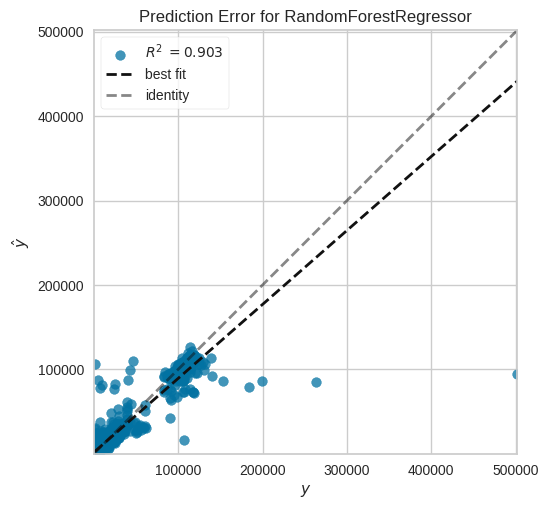

--------------
Cooks Distance Plot


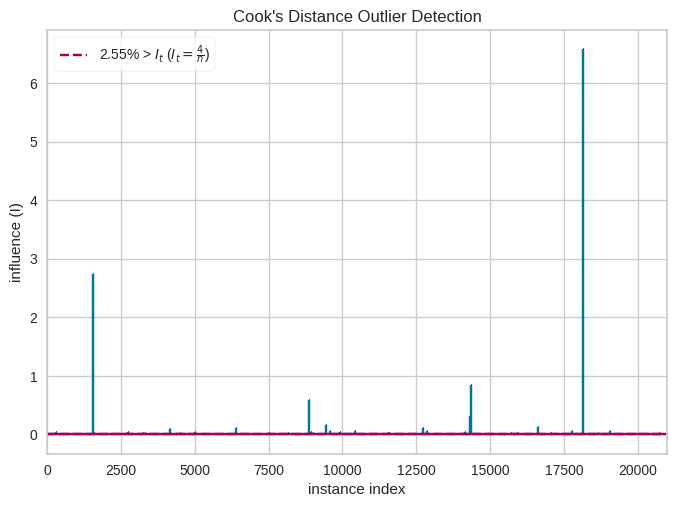

--------------
Feature Importance


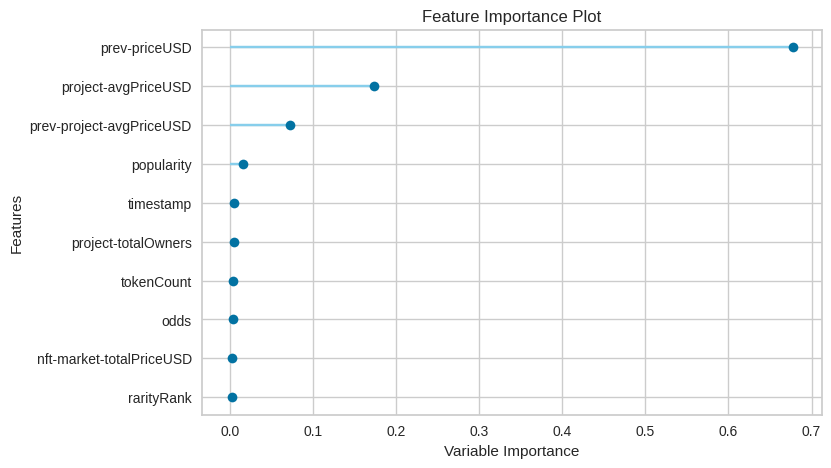

--------------
Feature Importance (All)


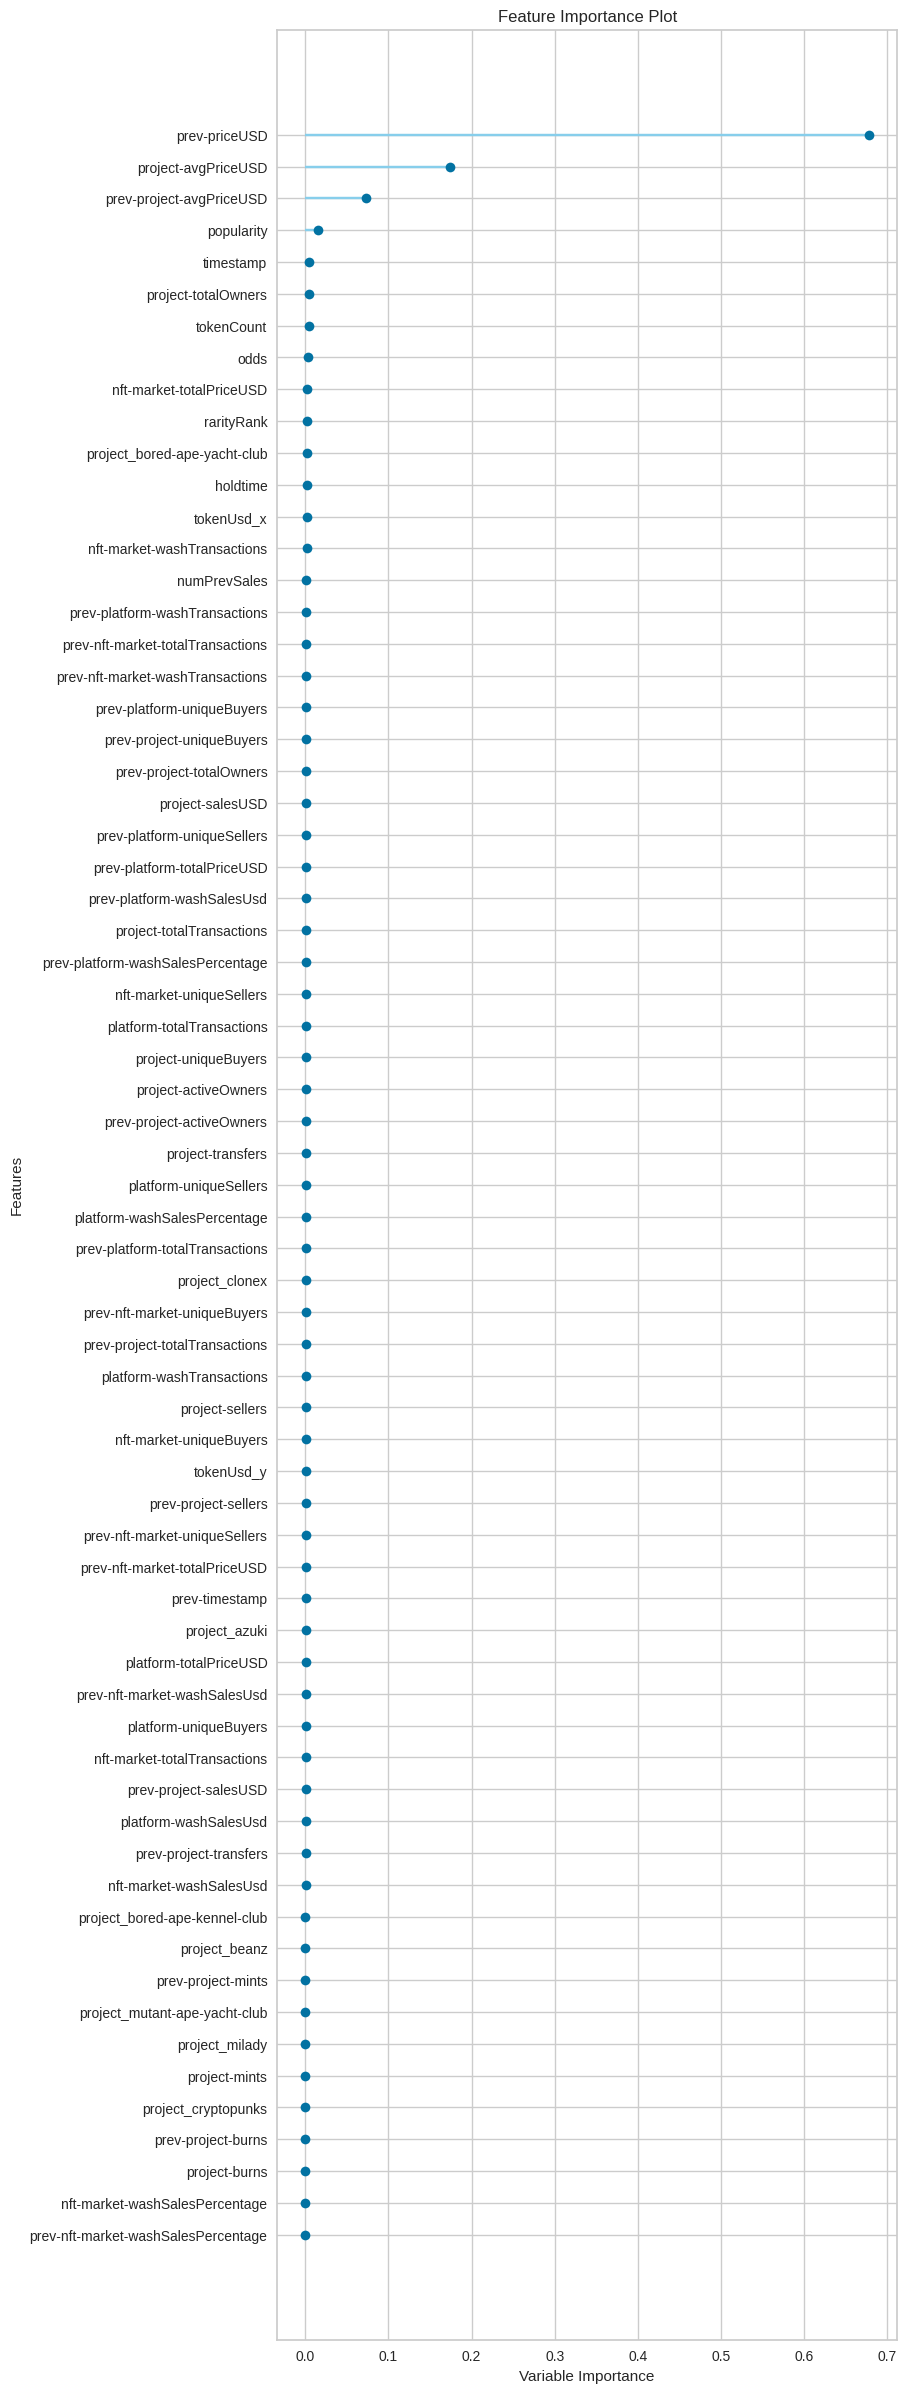

--------------
Model Hyperparameter


,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,squared_error
max_depth,None
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2


--------------


In [ ]:
for plot in plots:
    print(plot['description'])
    s.plot_model(best, plot = plot['name'])
    print('--------------')

In [ ]:
s.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,748.5095,37640206.5258,6135.1615,0.9021,0.2489,6291.5583


,platform,tokenCount,rarityRank,odds,timestamp,prev-priceUSD,prev-timestamp,numPrevSales,holdtime,project-salesUSD,...,prev-nft-market-totalTransactions,prev-nft-market-uniqueBuyers,prev-nft-market-uniqueSellers,prev-nft-market-totalPriceUSD,prev-nft-market-washSalesUsd,prev-nft-market-washTransactions,prev-nft-market-washSalesPercentage,popularity,priceUSD,prediction_label
27429,ethereum,9602,2168,31.903921,1678147200,10464.416016,1672272000,7,5962896.0,9.307838e+04,...,240865,55452,59553,28654600.0,9318176.0,4488,0,0.998385,11250.541992,11371.371406
9262,ethereum,19484,19142,37.365356,1677456000,7589.307129,1677456000,25,60756.0,8.908678e+04,...,346197,167447,42734,27586932.0,53701152.0,33111,0,0.681520,7811.500000,7799.709487
26413,ethereum,19469,6775,44.513165,1677628800,24842.570312,1677715200,19,1764.0,5.065811e+05,...,277772,65066,47033,30783956.0,64788052.0,30613,0,0.915402,24900.492188,24862.060156
3119,ethereum,10000,2147,26.991991,1682899200,6036.674316,1682899200,9,24336.0,1.600018e+06,...,257568,45690,53501,15773114.0,14212482.0,10397,0,0.999813,6358.073730,6107.649551
10381,ethereum,19950,2666,72.378212,1680220800,2668.101318,1680307200,15,28776.0,6.867648e+04,...,254084,64481,52975,28972510.0,24602994.0,15374,0,0.836797,2635.373047,2695.385576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12539,ethereum,19484,19160,37.105717,1678060800,7062.927734,1678060800,17,97236.0,1.415516e+05,...,344861,99592,51813,24572706.0,48041184.0,54451,0,0.449069,7071.300293,7046.270127
26647,ethereum,10000,6792,39.917545,1677628800,24596.441406,1677715200,21,38100.0,5.342516e+05,...,277772,65066,47033,30783956.0,64788052.0,30613,0,0.859374,24251.861328,24251.268223
28009,ethereum,10000,9250,32.009254,1680048000,23638.728516,1680134400,15,4188.0,1.376517e+05,...,245136,53390,54276,26675018.0,28976914.0,20083,0,1.620370,23591.521484,23656.594375
1800,ethereum,19469,16353,23.607592,1678665600,24056.365234,1678752000,29,9204.0,5.644648e+05,...,273112,56000,50248,24245430.0,31191272.0,17780,0,0.938880,23660.916016,23741.532910


In [ ]:
files.download('col_base.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
s.save_model(best, 'col_without_platform')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['tokenCount', 'rarityRank', 'odds',
                                              'timestamp', 'prev-priceUSD',
                                              'prev-timestamp', 'numPrevSales',
                                              'holdtime', 'project-salesUSD',
                                              'project-uniqueBuyers',
                                              'project-sellers',
                                              'project-totalTransactions',
                                              'project-activeOwners',
                                              'project-totalOwners',
                                              'project...
                  TransformerWrapper(include=['project'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',


In [ ]:
loaded_model = s.load_model('my_best_pipeline')
print(loaded_model)